<a href="https://colab.research.google.com/github/alunfes/1m-btc-data/blob/master/LGBM_Trading_Points.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Aug  7 13:57:59 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip uninstall --yes lightgbm && pip install --install-option=--gpu lightgbm

Found existing installation: lightgbm 2.2.3
Uninstalling lightgbm-2.2.3:
  Successfully uninstalled lightgbm-2.2.3
/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py:232: UserWarning: Disabling all use of wheels due to the use of --build-option / --global-option / --install-option.
  cmdoptions.check_install_build_global(options)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 33.5 MB/s 
Skipping wheel build for lightgbm, due to binaries being disabled for it.
    Running setup.py install for lightgbm ... done


In [5]:
'''
!sudo rm -rf /content/LightGBM
!git clone --recursive https://github.com/Microsoft/LightGBM
#!git clone --recursive https://github.com/microsoft/LightGBM/tree/v2.3.1
%cd /content/LightGBM/
!mkdir build
!cmake -DUSE_GPU=1 #avoid ..
!make -j$(nproc)
!sudo apt-get -y install python-pip
!sudo -H pip install setuptools pandas numpy scipy scikit-learn -U
%cd ./python-package
!sudo python setup.py install --precompile
'''

'\n!sudo rm -rf /content/LightGBM\n!git clone --recursive https://github.com/Microsoft/LightGBM\n#!git clone --recursive https://github.com/microsoft/LightGBM/tree/v2.3.1\n%cd /content/LightGBM/\n!mkdir build\n!cmake -DUSE_GPU=1 #avoid ..\n!make -j$(nproc)\n!sudo apt-get -y install python-pip\n!sudo -H pip install setuptools pandas numpy scipy scikit-learn -U\n%cd ./python-package\n!sudo python setup.py install --precompile\n'

In [6]:
#%cp -rp '/content/drive/My Drive/ta-lib/' ~/
%cd ~
!rm -rf ta-lib*
#!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!wget https://sourceforge.net/projects/ta-lib/files/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
#%cd '/content/drive/My Drive/ta-lib'
#%cd ta-lib
import os
#os.chdir('/content/drive/My Drive/ta-lib') # Can't use !cd in co-lab
os.chdir('ta-lib') # Can't use !cd in co-lab
#%cd ~/ta-lib
!./configure --prefix=/usr
#! '/content/drive/My Drive/ta-lib/configure' --prefix=/usr
!make
!make install
!pip install Ta-Lib
%cd /content

/root
--2022-08-07 13:59:42--  https://sourceforge.net/projects/ta-lib/files/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving sourceforge.net (sourceforge.net)... 104.18.34.243, 172.64.153.13
Connecting to sourceforge.net (sourceforge.net)|104.18.34.243|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://sourceforge.net/projects/ta-lib/files/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz/ [following]
--2022-08-07 13:59:42--  https://sourceforge.net/projects/ta-lib/files/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz/
Reusing existing connection to sourceforge.net:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://sourceforge.net/projects/ta-lib/files/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz/download [following]
--2022-08-07 13:59:42--  https://sourceforge.net/projects/ta-lib/files/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz/download
Reusing existing connection to sourceforge.net:443.
HTTP request sent, awaiting response... 302 Found
Locat

In [7]:
!pip install optuna
!pip install joblib
!pip install six
!pip install bayesian-optimization
#!pip install stable-baselines3 --upgrade
#!pip install tensorboardcolab
#!pip --no-cache-dir install lightgbm --install-option=--gpu --install-option="--opencl-include-dir=/usr/local/cuda/include/" --install-option="--opencl-library=/usr/local/cuda/lib64/libOpenCL.so"
#!pip install lightgbm --install-option=--GPU
#!sudo pip --no-cache-dir install -I lightgbm --install-option=--gpu --install-option="--opencl-include-dir=/usr/local/cuda/include/" --install-option="--opencl-library=/usr/local/cuda/lib64/libOpenCL.so"

import lightgbm as lgb
from sklearn import datasets
import dateutil
import copy
import sqlite3
from math import ceil, floor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import pickle
import csv
import matplotlib.pyplot as plt
from scipy.spatial.distance import correlation
import numpy as np
from numba import njit
from numba import prange
from numba.typed import List
import pandas as pd
#from multiprocessing import Pool, Value, Array
import multiprocessing as multi
from joblib import Parallel, delayed
import talib as ta
from datetime import datetime, timedelta, timezone
import sklearn.metrics
from sklearn.model_selection import train_test_split
from functools import partial
import optuna
import joblib
from joblib import Parallel, delayed
import time
import random
import collections

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 308 kB 32.8 MB/s 
     |████████████████████████████████| 209 kB 81.6 MB/s 
     |████████████████████████████████| 81 kB 8.8 MB/s 
     |████████████████████████████████| 78 kB 7.9 MB/s 
     |████████████████████████████████| 49 kB 2.5 MB/s 
     |████████████████████████████████| 147 kB 16.0 MB/s 
     |████████████████████████████████| 112 kB 79.8 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=980e95604de6c8c211d77681f80aac994e473de4cce6d4e5a24da68949672475
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in 

In [8]:
class MarketData:
    @classmethod
    def initialize(cls, from_ratio:float, end_ratio:float, terms_type:int):
        cls.terms = []
        if terms_type==0:
            cls.terms = [15, 25, 50, 100, 240]
        elif terms_type==1:
            cls.terms = [15, 25, 50, 100, 150, 300, 400, 800, 1000, 1440]
        else:
            cls.terms = [15, 25, 50, 100, 150, 300, 400, 600, 800, 1000, 1200, 1440, 1600, 1800]
        cls.df = pd.DataFrame()
        cls.tp = []
        cls.open = []
        cls.high = []
        cls.low = []
        cls.close = []
        cls.vol = []
        cls.ma = {}
        cls.ma_kairi = {}
        cls.rsi = {}
        cls.atr = {}
        cls.aroon_os = {}
        cls.cci = {}
        cls.dx = {}
        cls.macd = {}
        cls.macd_signal = {}
        cls.macd_hist = {}
        cls.rate_of_change = {}
        cls.williams_r = {}
        cls.correlation = {}
        cls.momentum_size = {}
        cls.stochastic = {}
        cls.bop = []
        cls.cmo = {}
        cls.__read_data()
        cls.__cut_data(from_ratio, end_ratio)
        cls.__calc_index()
        print('initialized MarketData')
    
    @classmethod
    def __read_data(cls):
        cls.df = pd.read_csv('/content/drive/My Drive/BTC-PERP-1mcp.csv')
        cls.tp = list(pd.read_csv('/content/drive/My Drive/tp_ptlc_0.025-0.005.csv')['tp'])
        #cls.tp = list(pd.read_csv('/content/drive/My Drive/tp_ptlc_0.05-0.005.csv')['tp'])
        cls.ts = list(cls.df['ts'])
        cls.open = list(cls.df['open'])
        cls.high = list(cls.df['high'])
        cls.low = list(cls.df['low'])
        cls.close = list(cls.df['close'])
        cls.vol = list(cls.df['volume'])
    
    @classmethod
    def __cut_data(cls, from_ratio:float, end_ratio:float):
        from_ind = int(len(cls.df) * from_ratio)
        end_ind = int(len(cls.df) * end_ratio)
        cls.df = cls.df.iloc[from_ind:end_ind]
        cls.tp = cls.tp[from_ind:end_ind]
        cls.ts = cls.ts[from_ind:end_ind]
        cls.open = cls.open[from_ind:end_ind]
        cls.high = cls.high[from_ind:end_ind]
        cls.low = cls.low[from_ind:end_ind]
        cls.close = cls.close[from_ind:end_ind]
        cls.vol = cls.vol[from_ind:end_ind]


    @classmethod
    def __calc_index(cls):
        for term in cls.terms:
            cls.ma[term] = cls.__calc_ma(term)
            cls.ma_kairi[term] = cls.__calc_ma_kairi(term)
            cls.rsi[term] = cls.__calc_rsi(term)
            cls.atr[term] = cls.__calc_atr(term)
            cls.aroon_os[term] = cls.__calc_aroon_os(term)
            cls.cci[term] = cls.__calc_cci(term)
            cls.dx[term] = cls.__calc_dx(term)
            cls.macd[term] = cls.__calc_macd(term)
            cls.macd_signal[term] = cls.__calc_macd_signal(term)
            cls.macd_hist[term] = cls.__calc_macd_hist(term)
            cls.rate_of_change[term] = cls.__calc_rate_of_change(term)
            cls.williams_r[term] = cls.__calc_williams_R(term)
            cls.correlation[term] = cls.__calc_correl(term)
            cls.momentum_size[term] = cls.__calc_momentum_size(term)
            cls.stochastic[term] = cls.__calc_stochastic(term)
            cls.cmo[term] = cls.__calc_cmo(term)
        cls.bop = cls.__calc_bop()

    @classmethod
    def __calc_ma(cls, term):
        return list(ta.MA(np.array(cls.close, dtype='f8'), timeperiod=term))
    
    @classmethod
    def __calc_ma_kairi(cls, term):
        ma = cls.__calc_ma(term)
        return list(map(lambda c, e: (c - e) / e, np.array(cls.close, dtype='f8'), np.array(ma, dtype='f8')))
    
    @classmethod
    def __calc_rsi(cls, term):
        return ta.RSI(np.array(cls.close, dtype='f8'), timeperiod=term)
    
    @classmethod
    def __calc_atr(cls, term):
        return ta.ATR(np.array(cls.high, dtype='f8'), np.array(cls.low, dtype='f8'), np.array(cls.close, dtype='f8'), timeperiod=term)
    
    @classmethod
    def __calc_correl(cls, term):
        return list(ta.CORREL(np.array(cls.high, dtype='f8'), np.array(cls.low, dtype='f8'), timeperiod=term))
    
    @classmethod
    def __calc_williams_R(cls, term):
        return list(ta.WILLR(np.array(cls.high, dtype='f8'), np.array(cls.low, dtype='f8'), np.array(cls.close, dtype='f8'),timeperiod=term))
    
    @classmethod
    def __calc_rate_of_change(cls, term):
        return list(ta.ROC(np.array(cls.close, dtype='f8'), timeperiod=term))
    
    @classmethod
    def __calc_momentum_size(cls, term):
        return list(ta.MOM(np.array(cls.vol, dtype='f8'), timeperiod=term))
    
    @classmethod
    def __calc_macd(cls, term):
        slowperiod = term
        fastperiod= int(term / 2.0)
        signalperiod=int(term / 3.0)
        macd, signal, hist =  ta.MACD(np.array(cls.close, dtype='f8'), np.array(fastperiod, dtype='i8'), np.array(slowperiod, dtype='i8'), np.array(signalperiod, dtype='i8'))
        return macd
    
    @classmethod
    def __calc_macd_signal(cls, term):
        slowperiod = term
        fastperiod= int(term / 2.0)
        signalperiod=int(term / 3.0)
        macd, signal, hist =  ta.MACD(np.array(cls.close, dtype='f8'), np.array(fastperiod, dtype='i8'), np.array(slowperiod, dtype='i8'),
                       np.array(signalperiod, dtype='i8'))
        return signal
    
    @classmethod
    def __calc_macd_hist(cls, term):
        slowperiod = term
        fastperiod= int(term / 2.0)
        signalperiod=int(term / 3.0)
        macd, signal, hist = ta.MACD(np.array(cls.close, dtype='f8'), np.array(fastperiod, dtype='i8'), np.array(slowperiod, dtype='i8'),
                       np.array(signalperiod, dtype='i8'))
        return hist
    
    @classmethod
    def __calc_aroon_os(cls, term):
        return list(ta.AROONOSC(np.array(cls.high, dtype='f8'), np.array(cls.low, dtype='f8'), timeperiod=term))

    @classmethod
    def __calc_cci(cls, term):
        return list(ta.CCI(np.array(cls.high, dtype='f8'), np.array(cls.low, dtype='f8'), np.array(cls.close, dtype='f8'), timeperiod=term))

    @classmethod
    def __calc_dx(cls, term):
        return list(ta.DX(np.array(cls.high, dtype='f8'), np.array(cls.low, dtype='f8'), np.array(cls.close, dtype='f8'), timeperiod=term))
    
    @classmethod
    def __calc_stochastic(cls, term):
        k_term = term
        d_term = int(term / 2.0)
        fastk, fastd = ta.STOCHF(np.array(cls.high, dtype='f8'), np.array(cls.low, dtype='f8'), np.array(cls.close, dtype='f8'), fastk_period=k_term, fastd_period=d_term, fastd_matype=0)
        return list(np.array(fastk) / np.array(fastd))

    @classmethod
    def __calc_bop(cls):
        return ta.BOP(np.array(cls.open, dtype='f8'), np.array(cls.high, dtype='f8'), np.array(cls.low, dtype='f8'), np.array(cls.close, dtype='f8'))

    @classmethod
    def __calc_cmo(cls, term):
        return list(ta.CMO(np.array(cls.close, dtype='f8'), timeperiod=term))
    
    @classmethod

    def __calc_inner_product(cls, vec_a:list, vec_b:list, term):
        np.dot(vec_a, vec_b)
    

In [9]:
class Account:
    def __init__(self):
        self.asset = 100000
        self.fee = 0.00075
        self.slip_page = 1.0 #usd
        self.lot_size = 1.0
        self.initialize_holding_data()
        self.initialize_performance_data()


    def initialize_holding_data(self):
        self.holding_side= ''
        self.holding_price = 0.0
        self.holding_lot = 0.0
        self.holding_i = 0
    
    def initialize_performance_data(self):
        self.total_pl = 0.0
        self.total_pl_log = []
        self.total_asset_log = []
        self.holding_side_log = []
        self.i_log = []
        self.total_fee = 0.0
        self.realized_pl = 0.0
        self.unrealized_pl = 0.0
        self.num_trade = 0
        self.num_win = 0
        self.win_rate = 0.0
        self.change_vola = 0.0
        self.max_pl_ratio = 0.0
    
    def move_to_next(self, i):
        if self.holding_side != '':
            self.unrealized_pl = self.holding_lot * MarketData.close[i] * (MarketData.close[i] - self.holding_price if self.holding_side == 'buy' else self.holding_price - MarketData.close[i]) / self.holding_price
        else:
            self.unrealized_pl = 0.0
        self.total_pl = self.realized_pl + self.unrealized_pl - self.total_fee
        self.total_pl_log.append(self.total_pl)
        self.total_asset_log.append(self.total_pl + self.asset)
        self.holding_side_log.append(self.holding_side)
        self.i_log.append(i)
    
    def last_day(self,i):
        if self.holding_side != '':
            self.exit_process(MarketData.close[i], i)
        self.total_pl = self.realized_pl + self.unrealized_pl - self.total_fee
        self.total_pl_log.append(self.total_pl)
        self.total_asset_log.append(self.total_pl + self.asset)
        self.holding_side_log.append(self.holding_side)
        self.win_rate = self.num_win / self.num_trade if self.num_trade > 0 else 0
        self.max_pl_ratio = (max(self.total_asset_log) - self.total_asset_log[0]) / self.total_asset_log[0]
        self.i_log.append(i)
        self.calc_vola_change()


    def entry_order(self, i, side):
        if self.holding_side == '': #new entry
            self.holding_side = side
            self.holding_price = MarketData.close[i] + self.slip_page if side == 'buy' else MarketData.close[i] - self.slip_page
            self.holding_lot = self.lot_size * self.asset / MarketData.close[i]
            self.holding_i = i
            self.total_fee += self.fee * self.holding_lot * MarketData.close[i]
        elif self.holding_side == side:
            print('Additional entry is not allowed !')
        else:
            self.exit_process(MarketData.close[i], i)
            
    def exit_process(self, price, i):
        self.total_fee += self.fee * self.holding_lot * price
        pl = self.holding_lot * price * (price - self.holding_price if self.holding_side == 'buy' else self.holding_price - price) / self.holding_price
        self.num_trade +=1
        #print('exit process;', ', i=', i, ', pl=', pl, ', holding side=', self.holding_side, ', holding i=', self.holding_i)
        if pl > 0:
            self.num_win += 1
        self.realized_pl += pl
        self.initialize_holding_data()
    
    def calc_vola_change(self):
        vola = 0
        change_ratio = []
        for i in range(len(self.total_asset_log) - 1):
            change_ratio.append((self.total_asset_log[i+1] - self.total_asset_log[i]) / self.total_asset_log[i])
        ave = sum(change_ratio) / len(change_ratio)
        for c in change_ratio:
            vola += pow((c - ave), 2)
        self.change_vola = pow(vola / len(change_ratio), 0.5)

In [10]:
class Strategy:
    @classmethod
    def lgbm_tp_simple(cls, i, pred_ind:int, ac:Account, pred, pt, lc):
        side = []
        pred_side = {0:'none', 1:'buy', 2:'sell'}[pred[pred_ind]]
        if ac.holding_side =='' and pred_side != 'none': #new entry
            side.append(pred_side)
        else:
            ptlc = cls.__check_pt_lc(i, ac, pt, lc)
            if ptlc != 'none':
                side.append('buy' if ac.holding_side == 'sell' else 'sell')
        return side
    
    @classmethod
    def lgbm_tp_quick_change(cls, i, pred_ind:int, ac:Account, pred, num_opposite_pred_for_change, pt, lc):
        side = []
        pred_side = {0:'none', 1:'buy', 2:'sell'}[pred[pred_ind]]
        if ac.holding_side =='' and pred_side != 'none': #new entry
            side.append(pred_side)
        else:
            ptlc = cls.__check_pt_lc(i, ac, pt, lc)
            if ptlc != 'none':
                side.append('buy' if ac.holding_side == 'sell' else 'sell')
            else:
                if pred_side != 'none' and ac.holding_side != pred_side: #check for quick change
                    if pred_side == 'buy':
                        if sum(pred[pred_ind - num_opposite_pred_for_change:pred_ind+1]) == num_opposite_pred_for_change:
                            side.append('buy') #exist and opposite entry
                            side.append('buy')
                    else:
                        if sum(pred[pred_ind - num_opposite_pred_for_change:pred_ind+1]) == (2 * num_opposite_pred_for_change):
                            side.append('sell') #exist and opposite entry
                            side.append('sell')
        return side

    @classmethod
    def lgbm_tp_quick_change2(cls, i, pred_ind:int, ac:Account, pred, num_quick, opposite_ratio, pt, lc):
        side = []
        pred_side = {0:'none', 1:'buy', 2:'sell'}[pred[pred_ind]]
        if ac.holding_side =='' and pred_side != 'none': #new entry
            side.append(pred_side)
        else:
            ptlc = cls.__check_pt_lc(i, ac, pt, lc)
            if ptlc != 'none':
                side.append('buy' if ac.holding_side == 'sell' else 'sell')
            else:
                if pred_side != 'none' and ac.holding_side != pred_side: #check for quick change
                    if pred_side == 'buy':
                        if pred[pred_ind - num_quick:pred_ind+1].count(1) >= int(opposite_ratio * num_quick):
                            side.append('buy') #exist and opposite entry
                            side.append('buy')
                    else:
                        if pred[pred_ind - num_quick:pred_ind+1].count(2) >= int(opposite_ratio * num_quick):
                            side.append('sell') #exist and opposite entry
                            side.append('sell')
        return side
    
    @classmethod
    def marketdata_tp_simple(cls, i, ac:Account, pt, lc):
        side = []
        pred_side = {0:'none', 1:'buy', 2:'sell'}[MarketData.tp[i]]
        if ac.holding_side =='' and pred_side != 'none': #new entry
            side.append(pred_side)
        else:
            ptlc = cls.__check_pt_lc(i, ac, pt, lc)
            if ptlc != 'none':
                side.append('buy' if ac.holding_side == 'sell' else 'sell')
        return side
        

    @classmethod
    def __check_pt_lc(cls, i, ac:Account, pt, lc):
        if ac.holding_side !='':
            pl = (MarketData.close[i] - ac.holding_price) / ac.holding_price if ac.holding_side == 'buy' else (ac.holding_price - MarketData.close[i]) / ac.holding_price
            if pl >= pt:
                #print('pt:', ', close=', MarketData.close[i], ', holding price=', ac.holding_price, 'holding i=', ac.holding_i, ', i=', i)
                return 'pt'
            elif pl <= lc:
                #print('lc:', ', close=', MarketData.close[i], ', holding price=', ac.holding_price, 'holding i=', ac.holding_i, ', i=', i)
                return 'lc'
            else:
                return 'none'
        else:
            return 'none'

In [11]:
class Sim:
    def lgbm_simple(self, from_ind, pred, pt, lc):
        ac = Account()
        num_loop = len(pred)
        i = 0
        pred_ind = 0
        for n in range(num_loop -1):
            i = n + from_ind
            sides = Strategy.lgbm_tp_simple(i, pred_ind, ac, pred, pt, lc)
            for side in sides:
                ac.entry_order(i, side)
            ac.move_to_next(i)
            pred_ind += 1
        ac.last_day(from_ind + num_loop)
        return ac
    
    def lgbm_conti(self, ac, from_ind, pred, pt, lc):
        num_loop = len(pred)
        i = 0
        pred_ind = 0
        for n in range(num_loop -1):
            i = n + from_ind
            sides = Strategy.lgbm_tp_simple(i, pred_ind, ac, pred, pt, lc)
            for side in sides:
                ac.entry_order(i, side)
            ac.move_to_next(i)
            pred_ind += 1
        ac.last_day(from_ind + num_loop)
        return ac

    def lgbm_quick_change(self, from_ind, pred, num_opposite_pred_for_change, pt, lc):
        ac = Account()
        num_loop = len(pred)
        i = 0
        pred_ind = 0
        for n in range(num_loop -1):
            i = n + from_ind
            sides = Strategy.lgbm_tp_quick_change(i, pred_ind, ac, pred, num_opposite_pred_for_change, pt, lc)
            for side in sides:
                ac.entry_order(i, side)
            ac.move_to_next(i)
            pred_ind += 1
        ac.last_day(from_ind + num_loop)
        return ac
    
    def lgbm_quick_change2(self, from_ind, pred, num_quick, opposite_ratio, pt, lc):
        ac = Account()
        num_loop = len(pred)
        i = 0
        pred_ind = 0
        for n in range(num_loop -1):
            i = n + from_ind
            sides = Strategy.lgbm_tp_quick_change2(i, pred_ind, ac, pred, num_quick, opposite_ratio, pt, lc)
            for side in sides:
                ac.entry_order(i, side)
            ac.move_to_next(i)
            pred_ind += 1
        ac.last_day(from_ind + num_loop)
        return ac
    
    def marketdata_tp_simple(self, from_ind, end_ind, pt, lc):
        ac = Account()
        i = 0
        num_loop = end_ind - from_ind
        for n in range(num_loop -1):
            i = n + from_ind
            sides = Strategy.marketdata_tp_simple(i, ac, pt, lc)
            for side in sides:
                ac.entry_order(i, side)
            ac.move_to_next(i)
        ac.last_day(from_ind + num_loop)
        return ac

In [13]:
class LGBMDataGenerator:
    def generate_lgbm_data(self, tuning_point:bool, selected_index:list):
        lgbm_data = pd.DataFrame()
        if selected_index[0]:
            lgbm_data = self.__generate_marketdata_index_df('ma_kairi', MarketData.ma_kairi)
        if selected_index[1]:
            lgbm_data = pd.concat([lgbm_data, self.__generate_marketdata_index_df('rsi', MarketData.rsi)], axis=1)
        if selected_index[2]:
            lgbm_data = pd.concat([lgbm_data, self.__generate_marketdata_index_df('atr', MarketData.atr)], axis=1)
        if selected_index[3]:
            lgbm_data = pd.concat([lgbm_data, self.__generate_marketdata_index_df('cci', MarketData.cci)], axis=1)
        if selected_index[4]:
            lgbm_data = pd.concat([lgbm_data, self.__generate_marketdata_index_df('dx', MarketData.dx)], axis=1)
        if selected_index[5]:
            lgbm_data = pd.concat([lgbm_data, self.__generate_marketdata_index_df('macd', MarketData.macd)], axis=1)
        if selected_index[6]:
            lgbm_data = pd.concat([lgbm_data, self.__generate_marketdata_index_df('macd_signal', MarketData.macd_signal)], axis=1)
        if selected_index[7]:
            lgbm_data = pd.concat([lgbm_data, self.__generate_marketdata_index_df('macd_hist', MarketData.macd_hist)], axis=1)
        if selected_index[8]:
            lgbm_data = pd.concat([lgbm_data, self.__generate_marketdata_index_df('rate_of_change', MarketData.rate_of_change)], axis=1)
        if selected_index[9]:
            lgbm_data = pd.concat([lgbm_data, self.__generate_marketdata_index_df('williams_r', MarketData.williams_r)], axis=1)
        if selected_index[10]:
            lgbm_data = pd.concat([lgbm_data, self.__generate_marketdata_index_df('correlation', MarketData.correlation)], axis=1)
        if selected_index[11]:
            lgbm_data = pd.concat([lgbm_data, self.__generate_marketdata_index_df('stochastic', MarketData.stochastic)], axis=1)
        if selected_index[12]:
            lgbm_data = pd.concat([lgbm_data, self.__generate_marketdata_index_df('cmo', MarketData.cmo)], axis=1)
        if selected_index[13]:
            lgbm_data = pd.concat([lgbm_data, pd.DataFrame({'bop':MarketData.bop})], axis=1)
        #lgbm_data = pd.concat([lgbm_data, self.__generate_marketdata_index_df('momentum_size', MarketData.momentum_size)], axis=1)
        if tuning_point:
            tp = self.__detect_turning_point(60, 0.025, list(MarketData.tp)[:])
            lgbm_data = pd.concat([lgbm_data, self.__generate_tp(tp)], axis=1)
        else:
            lgbm_data = pd.concat([lgbm_data, self.__generate_tp(list(MarketData.tp)[:])], axis=1)
        lgbm_data = self.__remove_nan_data(lgbm_data)
        return lgbm_data


    def __remove_nan_data(self, df):
        null_check = df.isnull().any(axis=1)
        if True in null_check:
            for i in range(len(null_check)):
                if null_check[i] == False:
                    print('Removed ', i, ' data from lgbm_df to exclude nan.')
                    return df.iloc[i:]
        else:
            return df

    def convert_lgbm_train_test_data(self, df:pd.DataFrame, train_ratio:float):
        start_end_index = {}
        train_size_int = floor(len(df) * train_ratio)
        test_size_int = floor(len(df) * (1.0 - train_ratio))
        start_end_index = {'train_start':df.index[0], 'train_end':df.iloc[train_size_int-1].name, 'test_start':df.iloc[train_size_int].name, 
                           'test_end':df.iloc[train_size_int + test_size_int-1].name}
        train, test = train_test_split(df, train_size = train_size_int, test_size = test_size_int, shuffle=False)
        train_size_int = floor(len(train) * 0.9)
        test_size_int = floor(len(train) * 0.1)
        train, valid = train_test_split(train, train_size = train_size_int, test_size = test_size_int, shuffle=True)
        train_x = train.drop('tp', axis =1)
        train_y = train['tp']
        valid_x = valid.drop('tp', axis =1)
        valid_y = valid['tp']
        test_x = test.drop('tp', axis=1)
        test_y = test['tp']
        return train_x, train_y, valid_x, valid_y, test_x, test_y, start_end_index

    '''
    lgbm df first index = 100
    test start ind = 1400
    -> lgbm_df should be used since index num = 1400 - 100 
    '''
    def convert_lgbm_data_specified_period(self, lgbm_df:pd.DataFrame, train_period, opt_period, test_start_ind, test_period):
        start_ind = lgbm_df.index[0]
        test_x = lgbm_df.iloc[test_start_ind - start_ind : test_start_ind - start_ind + test_period].drop('tp', axis=1)
        test_y = lgbm_df.iloc[test_start_ind - start_ind : test_start_ind - start_ind + test_period]['tp']
        train_opt_df = lgbm_df.iloc[test_start_ind - start_ind - train_period - opt_period : test_start_ind - start_ind]
        train, opt = train_test_split(train_opt_df, train_size=train_period, test_size = opt_period, shuffle = False)
        start_end_index = {'train_start':train.index[0], 'train_end':train.iloc[-1].name, 'opt_start':opt.index[0], 'opt_end':opt.iloc[-1].name}
        train, valid = train_test_split(train, train_size = 0.9, test_size = 0.1, shuffle = True)
        train_x = train.drop('tp', axis=1)
        train_y = train['tp']
        valid_x = valid.drop('tp', axis=1)
        valid_y = valid['tp']
        opt_x = opt.drop('tp', axis=1)
        opt_y = opt['tp']
        start_end_index = {'test_start':test_x.index[0], 'test_end':test_x.iloc[-1].name}
        return train_x, train_y, valid_x, valid_y, opt_x, opt_y, test_x, test_y, start_end_index

    
    
    def sampling_train_data(self, train_df, none_sampling_ratio, buysell_sampling_ratio):
        main_df = pd.DataFrame()
        zero_df = train_df.query('tp == 0')
        one_df = train_df.query('tp == 1')
        two_df = train_df.query('tp == 2')
        zero_df = self.sampling(zero_df, none_sampling_ratio)
        main_df = pd.concat([main_df, zero_df])
        one_df = self.sampling(one_df, buysell_sampling_ratio)
        main_df = pd.concat([main_df, one_df])
        two_df = self.sampling(two_df, buysell_sampling_ratio)
        main_df = pd.concat([main_df, two_df])
        return main_df
    
    def sampling(self, df, sampling_ratio):
        res = []
        sampling_window = round(len(df) / (len(df) * sampling_ratio))
        i = 0
        while True:
            res.append(df.iloc[i])
            i += sampling_window
            if i >= len(df):
                break
        return pd.DataFrame(res)


    def __generate_marketdata_index_df(self, index_name, market_data_index):
        res = {}
        for term in MarketData.terms:
            res[index_name+'_'+str(term)] = market_data_index[term]
        return pd.DataFrame(res)

    def __generate_tp(self, tp):
        tp_df = {}
        tp_df['tp'] = tp
        return pd.DataFrame(tp_df)

    def __detect_turning_point(self, window:int, before_change_ratio:float, tp:list):
        tuning_points = []
        for i in range(window):
            tuning_points.append(0)
        for i in range(window, len(MarketData.close)):
            if tp[i] == 1:
                if (MarketData.close[i] - max(MarketData.close[i-window+1:i+1])) / MarketData.close[i] <= -before_change_ratio:
                    tuning_points.append(1)
                else:
                    tuning_points.append(0)
            elif tp[i] == 2:
                if (MarketData.close[i] - min(MarketData.close[i-window+1:i+1])) / MarketData.close[i] >= before_change_ratio:
                    tuning_points.append(2)
                else:
                    tuning_points.append(0)
            else:
                tuning_points.append(0)
        return tuning_points

    def tp_detect_normal_process(self, buy_sell, entry_price, from_ind, pt, lc):
        log_from_ind = from_ind
        while True:
            if buy_sell == 'buy':
                if MarketData.close[from_ind] > entry_price * (1.0 + pt):
                    return {'ptlc':'pt', 'i':from_ind}
                elif MarketData.close[i] <= entry_price * (1.0 -lc):
                    return {'ptlc':'lc', 'i':from_ind}
            else:
                if MarketData.close[from_ind] < entry_price * (1.0 - pt):
                    return {'ptlc':'pt', 'i':from_ind}
                elif MarketData.close[i] >= entry_price * (1.0 + lc):
                    return {'ptlc':'lc', 'i':from_ind}
            from_ind += 1
            if from_ind >= len(MarketData.close):
                return {'ptlc':'n/a', 'i':from_ind}


    def tp_detection_enhanced_process(self, buy_sell, ref_entry_price, ref_pt_lc, entry_price):
        if buy_sell == 'buy':
            if ref_pt_lc == 'pt':
                if ref_entry_price >= entry_price:
                    return 'pt'
                else:
                    return 'n/a'
            else:
                if ref_entry_price <= entry_price:
                    return 'lc'
                else:
                    return 'n/a'
        else:
            if ref_pt_lc == 'pt':
                if ref_entry_price <= entry_price:
                    return 'pt'
                else:
                    return 'n/a'
            else:
                if ref_entry_price >= entry_price:
                    return 'lc'
                else:
                    return 'n/a'


    def generate_ptlc_point_data(self, pt, lc):
        #generate ptlc point data
        buy_sell_ptlc_points = [] #0:no, 1:buy, 2:sell
        for i in range(len(MarketData.close)):
            buy_check = self.__check_pt_lc(i, 'buy', pt, lc)
            sell_check = self.__check_pt_lc(i, 'sell', pt, lc)
            if buy_check > 0 and sell_check < 0: #only buy hit
                buy_sell_ptlc_points.append(1)
            elif buy_check < 0 and sell_check > 0: #only sell hit
                buy_sell_ptlc_points.append(2)
            elif buy_check > 0 and sell_check > 0: #both buy & sell hit
                if buy_check < sell_check: #buy hit comes first
                    buy_sell_ptlc_points.append(1)
                else:
                    buy_sell_ptlc_points.append(2)
            else:
                buy_sell_ptlc_points.append(0)
        return buy_sell_ptlc_points


    def __check_pt_lc(self, i:int, buy_or_sell:str, pt:float, lc:float):        
        entry_price = MarketData.close[i]
        while True:
            if buy_or_sell == 'buy':
                if MarketData.close[i] > entry_price * (1.0 + pt):
                    return i
                elif MarketData.close[i] <= entry_price * (1.0 - lc):
                    return -1
            elif buy_or_sell == 'sell':
                if MarketData.close[i] < entry_price * (1.0 - pt):
                    return i
                elif MarketData.close[i] >= entry_price * (1.0 + lc):
                    return -1
            i += 1
            if i >= len(MarketData.close):
                break
        return -1


In [14]:
class LGBM:
    def load_model(self):
        with open('/content/drive/My Drive/Model/lgbm_tp_model.dat', mode='rb') as f:
            self.model = pickle.load(f)
    
    def save_model(self, model):
        file = '/content/drive/My Drive/Model/lgbm_tp_model.dat'
        pickle.dump(model, open(file, 'wb'))

    def train(self, train_x, train_y, valid_x, valid_y, params):
        print('training data description')
        print('train_x:', train_x.shape)
        print('train_y:', train_y.shape)
        start_time = time.time()
        train = lgb.Dataset(train_x.values.astype(np.float32), train_y.values.astype(np.float32))
        valid = lgb.Dataset(valid_x.values.astype(np.float32), valid_y.values.astype(np.float32))
        lgbm_params = params
        model = lgb.train(
            lgbm_params, 
            train,
            valid_sets=[valid],
            #verbose_eval=False,
            callbacks=[lgb.early_stopping(stopping_rounds=10, 
                                verbose=False),
                           #lgb.log_evaluation(0)
                           ]
            )
        print('train elapsed time=', time.time() - start_time)
        return model
    
    def prediction(self, model, test_x, test_y):
        prediction = []
        pval = model.predict(test_x.values.astype(np.float32), num_iteration=model.best_iteration)
        for p in pval:
            prediction.append(np.argmax(p))
        acc = self.check_matched_rate(prediction, test_y)
        return prediction, acc
    
    def check_matched_rate(self, pred, test_y):
        #print('modelがbuy / sellを予測したときにそれが正しい確率')
        num_match = 0
        target = 0
        for i in range(len(pred)):
            if pred[i] != 0:
                target += 1
                if pred[i] == test_y.iloc[i]:
                    num_match += 1
        if target > 0:
            print('match rate=', num_match / target)
            return (num_match, target)
        else:
            print('match rate=', 0)
            return (num_match, target)



lgbm = LGBM()
params = {
            'objective' : 'multiclass',
            'num_class': 3,
            'boosting': 'gbdt',
            'tree_learner': 'data',
            'learning_rate':0.05,
            'num_iterations':1000,
            'lambda_l1':1.0,
            'lambda_l2':1.0,
            'extra_trees': True,
            #'device_type':'gpu',
            #'num_leaves':18,
            #'gpu_use_dp':True,
            'verbosity':-1,
        }



In [ ]:
train_x, train_y, valid_x, valid_y, test_x, test_y = ldg.convert_lgbm_train_test_data(lgbm_df.iloc[:100000], 0.8)

model = lgbm.train(train_x, pd.to_numeric(train_y), valid_x, pd.to_numeric(valid_y), params)
lgbm.save_model(model)
pred, acc = lgbm.prediction(model, test_x, pd.to_numeric(test_y))
print('target=', acc[1], ', num match=', acc[0])
plt.plot(pred)
importance = pd.DataFrame(model.feature_importance(), index = test_x.columns, columns=['importance'])
importance = importance.sort_values('importance', ascending=False)
display(importance)
#lgb.plot_metric(model)

total pl= -998.0871600389102 , num trade= 13 , win rate= 0.23076923076923078 , total asset vola= 0.06340125939340983 , max pl ratio= 0.013439717986909235


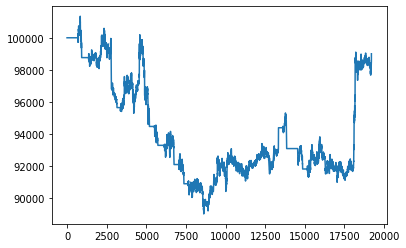

In [ ]:
sim = Sim()
ac = Account()
ac = sim.lgbm_simple(test_x.index[0], pred, 0.05, -0.01)
print('total pl=', ac.total_pl, ', num trade=', ac.num_trade, ', win rate=', ac.win_rate, ', total asset vola=', ac.change_vola * 100, ', max pl ratio=', ac.max_pl_ratio)
plt.plot(ac.total_asset_log)

In [15]:
def optPTLC(test_x_opt, pred_opt, num_quick_change):
    #lc_list = [-0.005, -0.007, -0.01, -0.015, -0.02]
    lc_list = [-0.005, -0.007, -0.009, -0.011, -0.013, -0.015, -0.017, -0.02, -0.03, -0.04, -0.05, -0.07]
    #pt_list = [0.03, 0.05, 0.07, 0.09, 0.12, 0.15, 0.2]
    pt_list = [0.01, 0.025, 0.035, 0.05, 0.07, 0.09, 0.11, 0.13, 0.15, 0.17, 0.2, 0.22, 0.25, 0.27, 0.3]
    pt_log = []
    lc_log = []
    pl = []
    num_trade = []
    win_rate = []
    vola = []
    max_pl = []
    i=0
    for lc in lc_list:
        for pt in pt_list:
            sim = Sim()
            ac = Account()
            if num_quick_change ==0:
                ac = sim.lgbm_simple(test_x_opt.index[0], pred_opt, pt, lc)
            else:
                ac = sim.lgbm_quick_change(test_x_opt.index[0], pred_opt, num_quick_change, pt, lc)
            pt_log.append(pt)
            lc_log.append(lc)
            pl.append(ac.total_pl)
            num_trade.append(ac.num_trade)
            win_rate.append(ac.win_rate)
            vola.append(ac.change_vola * 100)
            max_pl.append(ac.max_pl_ratio)
            i += 1
    hyou = {'pt':pt_log, 'lc':lc_log, 'total pl':pl, 'num_trade':num_trade, 'win_rate':win_rate, 'vola':vola, 'max_pl':max_pl}
    opt_df = pd.DataFrame(hyou)
    tp_list = list(opt_df['total pl'])
    opt_index = tp_list.index(max(tp_list))
    opt_pt = opt_df['pt'].iloc[opt_index]
    opt_lc = opt_df['lc'].iloc[opt_index]
    return opt_pt, opt_lc


#df = optPTLC(test_x, pred)
#df

In [16]:
def optQuickChange(test_x_opt, pred_opt, pt, lc):
    num_quick = [5, 10, 15, 20, 25, 30, 40, 50, 60]
    opposite_ratio = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
    nq_log = []
    opr_log = []
    pl = []
    num_trade = []
    win_rate = []
    vola = []
    max_pl = []
    i=0
    for nq in num_quick:
        for opr in opposite_ratio:
            sim = Sim()
            ac = Account()
            ac = sim.lgbm_quick_change2(test_x_opt.index[0], pred_opt, nq, opr, pt, lc)
            nq_log.append(nq)
            opr_log.append(opr)
            pl.append(ac.total_pl)
            num_trade.append(ac.num_trade)
            win_rate.append(ac.win_rate)
            vola.append(ac.change_vola * 100)
            max_pl.append(ac.max_pl_ratio)
            i += 1
    hyou = {'num_quick':nq_log, 'opposite_ratio':opr_log, 'total pl':pl, 'num_trade':num_trade, 'win_rate':win_rate, 'vola':vola, 'max_pl':max_pl}
    opt_df = pd.DataFrame(hyou)
    tp_list = list(opt_df['total pl'])
    opt_index = tp_list.index(max(tp_list))
    opt_num_quick = opt_df['num_quick'].iloc[opt_index]
    opt_opposite_ratio = opt_df['opposite_ratio'].iloc[opt_index]
    return opt_num_quick, opt_opposite_ratio


#df = optPTLC(test_x, pred)
#df

In [18]:
class ContiOptSim:
    def testVariousPeriods(self):
        start_time = time.time()
        term_type = 0
        MarketData.initialize(0.0, 1.0, term_type)
        tuning_point = False
        train_period = 10000
        opt_period = 10000
        test_period = 10000
        start_ind = 1000000
        num_quick_change = 0
        selected_index = [True, False, False, False, False, False, True, False, False, False, False, False, True, False]
        ldg = LGBMDataGenerator()
        lgbm_df = ldg.generate_lgbm_data(tuning_point, selected_index)
        param = {
                'objective' : 'multiclass',
                'num_class': 3,
                'boosting': 'gbdt',
                'tree_learner': 'data',
                'learning_rate':0.05,
                'num_iterations':300000,
                'lambda_l1':1.0,
                'lambda_l2':1.0,
                'extra_trees': True,
                'device_type':'gpu',
                #'num_leaves':18,
                #'gpu_use_dp':True,
                'verbosity':-1,
                #'verbose_eval':False,
            }
        
        num_test = 0
        self.initialize_log()
        ac_opt = Account()
        ac_normal = Account()
        pre_test_end = start_ind + train_period + opt_period
        while start_ind +train_period + opt_period + test_period < len(lgbm_df):
            ldg = LGBMDataGenerator()
            lgbm = LGBM()
            train_x, train_y, valid_x, valid_y, opt_x, opt_y, test_x, test_y, start_end_index = ldg.convert_lgbm_data_specified_period(lgbm_df, train_period, opt_period, pre_test_end + 1, test_period)
            model = lgbm.train(train_x, pd.to_numeric(train_y), valid_x, pd.to_numeric(valid_y), param)
            opt_pred, opt_acc = lgbm.prediction(model, opt_x, pd.to_numeric(opt_y))
            opt_pt, opt_lc = optPTLC(opt_x, opt_pred, num_quick_change)
            pred, acc = lgbm.prediction(model, test_x, pd.to_numeric(test_y))
            sim = Sim()
            ac_opt = sim.lgbm_conti(ac_opt, test_x.index[0], pred, opt_pt, opt_lc)
            ac_normal = sim.lgbm_conti(ac_normal, test_x.index[0], pred, 0.05, -0.005)
            print('#',num_test, ', test_start=', start_end_index['test_start'], 'test_end=', start_end_index['test_end'], 
                  'num iter=',model.best_iteration, ', log_loss=', model.best_score['valid_0']['multi_logloss'], ', total pl=', ac.total_pl, ', num trade=', ac.num_trade, ', win rate=', ac.win_rate)
            self.take_log(start_end_index['test_start'], start_end_index['test_end'], opt_pt, opt_lc, ac.total_pl_log, opt_acc[0]/opt_acc[1] if opt_acc[1] > 0 else 0,
                          model.best_iteration, model.best_score['valid_0']['multi_logloss'], acc[0]/acc[1] if acc[1] > 0 else 0, acc[1], acc[0])
            self.save_log()
            num_test += 1
            start_ind = start_end_index['test_end'] - train_period - opt_period
            pre_test_end = start_end_index['test_end']
            plt.plot(ac_opt.total_pl_log)
            plt.plot(ac_normal.total_pl_log)
        print('time elapsed=', time.time() - start_time)
        return pd.DataFrame(self.get_log())


    def initialize_log(self):
        self.test_start = []
        self.test_end = []
        self.opt_pt_log = []
        self.opt_lc_log = []
        self.opt_total_pl_log = []
        self.opt_match_rate_log = []
        self.num_iter_log = []
        self.log_loss_log = []
        self.match_rate_log = []
        self.target_log = []
        self.match_log = []
        self.log_dict = {}


    def take_log(self, test_start, test_end, opt_pt, opt_lc, total_pl, opt_match_rate, num_iter, log_loss, match_rate, target, match):
        self.test_start.append(test_start)
        self.test_end.append(test_end)
        self.opt_pt_log.append(opt_pt)
        self.opt_lc_log.append(opt_lc)
        self.opt_total_pl_log = total_pl
        self.opt_match_rate_log.append(opt_match_rate)
        self.num_iter_log.append(num_iter)
        self.log_loss_log.append(log_loss)
        self.target_log.append(target)
        self.match_log.append(match)
        self.match_rate_log.append(match_rate)
        self.log_dict = {'test_start':self.test_start, 'test_end':self.test_end, 'opt_pt':self.opt_pt_log, 'opt_lc':self.opt_lc_log,
                         'opt_match_rate':self.opt_match_rate_log, 'num_iter':self.num_iter_log, 'log_loss':self.log_loss_log,
                    'match_rate':self.match_rate_log, 'target':self.target_log, 'match':self.match_log}
    
    def get_log(self):
        return self.log_dict

    def save_log(self):
        pd.DataFrame(self.log_dict).to_csv('/content/drive/My Drive/conti_test.csv')
        pd.DataFrame({'total_pl':self.opt_total_pl_log}).to_csv('/content/drive/My Drive/conti_test_pl.csv')
        


cos = ContiOptSim()
df = cos.testVariousPeriods()
df


initialized MarketData
Removed  318  data from lgbm_df to exclude nan.
training data description
train_x: (9000, 15)
train_y: (9000,)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


train elapsed time= 22.16094160079956
match rate= 0.30710250201775624
match rate= 0.14493712772998016


NameError: ignored

In [95]:
class VeriousParamGenerator:
    def generate_params(self):
        test_ids = [0]
        test_names = [
                      'Ltrain-Sopt-Sindex-Sterm',
                      ]
        train_periods = [240000]
        opt_periods = [10000]
        test_periods = [10000]
        windows = [140000]#window = (50000 - opt) + 100000
        start_inds = [0]#start_ind = 290000 - train - opt
        term_types = [0]
        index_s = [True, False, False, False, False, False, True, False, False, False, False, False, True, False]
        index_m = [True, False, True, False, True, False, True, False, True, False, True, False, True, False]
        index_l = [True] * 14
        selected_indicies = [index_s]

        '''
        train_periods = np.array(train_periods) / 5
        train_periods = train_periods.astype(int)
        opt_periods = np.array(opt_periods) / 5
        opt_periods = opt_periods.astype(int)
        test_periods = np.array(test_periods) / 2
        test_periods = test_periods.astype(int)
        '''
        
        params = {'test_id':test_ids, 'test_name':test_names, 'term_type':term_types, 'selected_index':selected_indicies, 'train_period':train_periods, 
                  'opt_period':opt_periods, 'test_period':test_periods, 'window':windows, 'start_ind':start_inds}
        return params
        

In [99]:
class VariousParamTest:
    def global_test(self):
        tuning_p = False
        vpg = VeriousParamGenerator()
        params = vpg.generate_params()
        df_all = pd.DataFrame()
        MarketData.initialize(0.0, 1.0, params['term_type'][0])
        for i in params['test_id']:
            if i > 0 and params['term_type'][i] != params['term_type'][i-1]:
                MarketData.initialize(0.0, 1.0, params['term_type'][i])
            df = self.testVariousPeriods(i, params['test_name'][i], tuning_p, params['term_type'][i], params['selected_index'][i], params['train_period'][i],
                                    params['opt_period'][i], params['test_period'][i], params['window'][i], params['start_ind'][i])
            df_all = pd.concat([df_all, df])
            df_all.to_csv('/content/drive/My Drive/various_param_test.csv')
            #if i ==1:
            #    break
        df_all.to_csv('/content/drive/My Drive/various_param_test.csv')
        return df_all



    def testVariousPeriods(self, test_id:int, test_name:str, tuning_point:bool, term_type:int, selected_index:list, train_period:int, opt_period:int, test_period:int, window:int, start_ind:int):
        start_time = time.time()
        ldg = LGBMDataGenerator()
        lgbm_df = ldg.generate_lgbm_data(tuning_point, selected_index)
        param = {
                'objective' : 'multiclass',
                'num_class': 3,
                'boosting': 'gbdt',
                'tree_learner': 'data',
                'learning_rate':0.05,
                'num_iterations':300000,
                'lambda_l1':1.0,
                'lambda_l2':1.0,
                'extra_trees': True,
                'device_type':'gpu',
                #'gpu_use_dp':True,
                'verbosity':-1,
                #'verbose_eval':False,
            }
        num_test = 0
        self.initialize_log()
        while start_ind +train_period + opt_period + test_period < len(lgbm_df):
            ldg = LGBMDataGenerator()
            lgbm = LGBM()
            opt_lgbm_df = lgbm_df.iloc[start_ind : start_ind + train_period + opt_period]
            train_ratio = round(train_period / (train_period + opt_period), 4) - 0.01
            train_x, train_y, valid_x, valid_y, opt_x, opt_y, train_opt_period = ldg.convert_lgbm_train_test_data(opt_lgbm_df, train_ratio)
            print('train period=', train_opt_period['train_start'], '-', train_opt_period['train_end'])
            print('opt period=', train_opt_period['test_start'], '-', train_opt_period['test_end'])
            model = lgbm.train(train_x, pd.to_numeric(train_y), valid_x, pd.to_numeric(valid_y), param)
            opt_pred, opt_acc = lgbm.prediction(model, opt_x, pd.to_numeric(opt_y))
            opt_pt, opt_lc = optPTLC(opt_x, opt_pred, 0)
            opt_num_quick, opt_opposite_ratio = optQuickChange(opt_x, opt_pred, opt_pt, opt_lc)
            test_lgbm_df = lgbm_df.iloc[start_ind + train_period + opt_period: start_ind + train_period + opt_period + test_period]
            train_ratio = 0.01
            train_x, train_y, valid_x, valid_y, test_x, test_y, train_test_period = ldg.convert_lgbm_train_test_data(test_lgbm_df, train_ratio)
            print('test period=', train_test_period['test_start'], '-', train_test_period['test_end'])
            pred, acc = lgbm.prediction(model, test_x, pd.to_numeric(test_y))
            sim = Sim()
            ac_normal = Account()
            ac_opt = Account()
            ac_quick = Account
            ac_normal = sim.lgbm_simple(test_x.index[0], pred, 0.05, -0.005)
            ac_opt = sim.lgbm_simple(test_x.index[0], pred, opt_pt, opt_lc)
            ac_quick = sim.lgbm_quick_change2(test_x.index[0], pred, opt_num_quick, opt_opposite_ratio, opt_pt, opt_lc)
            print('#',num_test, ', num iter=',model.best_iteration, ', log_loss=', model.best_score['valid_0']['multi_logloss'], ', total pl=', ac_opt.total_pl, ', num trade=', ac_opt.num_trade, ', win rate=', ac_opt.win_rate, ', total asset vola=', ac_opt.change_vola * 100, ', max pl ratio=', ac_opt.max_pl_ratio)

            '''
            train_opt_period, train_test_period, train_period, opt_period, test_period,
            '''

            self.take_log(test_id, test_name, term_type, selected_index.count(True), str(time.time() - start_time), model.best_iteration, model.best_score['valid_0']['multi_logloss'], 
                          train_opt_period, train_test_period, train_period, opt_period, test_period, 0, opt_pt, opt_lc, opt_num_quick, opt_opposite_ratio, ac_opt.total_pl, ac_opt.num_trade, ac_opt.win_rate, ac_opt.max_pl_ratio, ac_opt.change_vola, 
                          ac_quick.total_pl, ac_quick.num_trade, ac_quick.win_rate, ac_quick.max_pl_ratio, ac_quick.change_vola, 
                            opt_acc[0] / opt_acc[1] if opt_acc[1] > 0 else 0 , ac_normal.total_pl, ac_normal.num_trade, ac_normal.win_rate, ac_normal.max_pl_ratio, ac_normal.change_vola, 
                            acc[0]/acc[1] if acc[1] > 0 else 0, acc[1], acc[0])
            #self.save_log()
            num_test += 1
            start_ind = start_ind + window
        print('time elapsed=', time.time() - start_time)
        return pd.DataFrame(self.get_log())


    def initialize_log(self):
        self.test_id_log = []
        self.test_name_log = []
        self.term_type_log = []
        self.num_index_log = []
        self.time_elapsed_log = []
        self.num_iter_log = []
        self.log_loss_log = []
        self.train_start_log = []
        self.train_end_log = []
        self.opt_start_log = []
        self.opt_end_log = []
        self.test_start_log = []
        self.test_end_log = []
        self.train_period_log = []
        self.opt_period_log = []
        self.test_period_log = []
        self.quick_num_log = []
        self.quick_ratio_log = []
        self.params_log = []
        self.opt_pt_log = []
        self.opt_lc_log = []
        self.opt_total_pl_log = []
        self.opt_num_log = []
        self.opt_win_rate_log = []
        self.opt_max_pl_log = []
        self.opt_vola_log = []
        self.quick_total_pl_log = []
        self.quick_num_log = []
        self.quick_win_rate_log = []
        self.quick_max_pl_log = []
        self.quick_vola_log = []
        self.opt_match_rate = []
        self.base_total_pl_log = []
        self.base_num_log = []
        self.base_win_rate_log = []
        self.base_max_pl_log = []
        self.base_vola_log = []
        self.acc_log = []
        self.match_rate_log = []
        self.target_log = []
        self.match_log = []
        self.log_dict = {}


    def take_log(self, test_id, test_name, term_type, num_index, time_elapsed, num_iter, log_loss, train_opt_period, train_test_period, train_period, opt_period, test_period, param, opt_pt, opt_lc, quick_num, quick_ratio, opt_total_pl, opt_num, opt_winr, opt_maxpl, opt_vola, quick_total_pl, quick_num_trade, quick_winr, quick_maxpl, quick_vola, opt_match_rate, base_total_pl, base_num, base_winr, base_maxpl, base_vola, match_rate, target, match):
        self.test_id_log.append(test_id)
        self.test_name_log.append(test_name)
        self.term_type_log.append(term_type)
        self.num_index_log.append(num_index)
        self.time_elapsed_log.append(time_elapsed)
        self.num_iter_log.append(num_iter)
        self.log_loss_log.append(log_loss)
        self.train_start_log.append(train_opt_period['train_start'])
        self.train_end_log.append(train_opt_period['train_end'])
        self.opt_start_log.append(train_opt_period['test_start'])
        self.opt_end_log.append(train_opt_period['test_end'])
        self.test_start_log.append(train_test_period['test_start'])
        self.test_end_log.append(train_test_period['test_end'])
        self.train_period_log.append(train_period)
        self.opt_period_log.append(opt_period)
        self.test_period_log.append(test_period)
        self.params_log.append(param)
        self.opt_pt_log.append(opt_pt)
        self.opt_lc_log.append(opt_lc)
        self.quick_num_log.append(quick_num)
        self.quick_ratio_log.append(quick_ratio)
        self.opt_total_pl_log.append(opt_total_pl)
        self.opt_num_log.append(opt_num)
        self.opt_win_rate_log.append(opt_winr)
        self.opt_max_pl_log.append(opt_maxpl)
        self.opt_vola_log.append(opt_vola)
        self.quick_total_pl_log.append(quick_total_pl)
        self.quick_win_rate_log.append(quick_winr)
        self.quick_max_pl_log.append(quick_maxpl)
        self.quick_vola_log.append(quick_vola)
        self.opt_match_rate.append(opt_match_rate)
        self.base_total_pl_log.append(base_total_pl)
        self.base_num_log.append(base_num)
        self.base_win_rate_log.append(base_winr)
        self.base_max_pl_log.append(base_maxpl)
        self.base_vola_log.append(base_vola)
        self.match_rate_log.append(match_rate)
        self.target_log.append(target)
        self.match_log.append(match)
        self.log_dict = {'test_id':self.test_id_log, 'test_name':self.test_name_log, 'term_type':self.term_type_log, 'num_index':self.num_index_log, 'time_elapsed':self.time_elapsed_log, 'num_iter':self.num_iter_log, 'log_loss':self.log_loss_log,
                         'train_period':self.train_period_log, 'opt_period':self.opt_period_log, 'test_period':self.test_period_log, 'train_start':self.train_start_log, 'train_end':self.train_end_log, 
                         'opt_start':self.opt_start_log, 'opt_end':self.opt_end_log, 'test_start':self.test_start_log, 'test_end':self.test_end_log, 
                         'params':self.params_log, 'opt_pt':self.opt_pt_log, 'opt_lc':self.opt_lc_log, 'quick_num':self.quick_num_log, 'quick_ratio':self.quick_ratio_log,
                         'opt_match_rate':self.opt_match_rate, 'match_rate':self.match_rate_log, 'target':self.target_log, 'match':self.match_log,
                         'base_total_pl':self.base_total_pl_log, 'base_num':self.base_num_log, 'base_winr':self.base_win_rate_log, 'base_maxpl':self.base_max_pl_log, 'base_vola':self.base_vola_log,
                          'opt_total_pl':self.opt_total_pl_log, 'opt_num':self.opt_num_log, 'opt_winr':self.opt_win_rate_log, 'opt_maxpl':self.opt_max_pl_log, 'opt_vola':self.opt_vola_log,
                         'quick_total_pl':self.quick_total_pl_log, 'quick_num':self.quick_num_log, 'quick_winr':self.quick_win_rate_log, 'quick_maxpl':self.quick_max_pl_log, 'quick_vola':self.quick_vola_log,
                    }
    
    def get_log(self):
        return self.log_dict

    def save_log(self):
        pd.DataFrame(self.log_dict).to_csv('/content/drive/My Drive/various_period_test.csv')


vpt = VariousParamTest()
df = vpt.global_test()



initialized MarketData
Removed  318  data from lgbm_df to exclude nan.
train period= 318 - 23977
opt period= 23978 - 34316
training data description
train_x: (21294, 15)
train_y: (21294,)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


train elapsed time= 59.1946861743927
match rate= 0.19828134945894335
test period= 34418 - 44317
match rate= 0.16609505144536993
# 0 , num iter= 7613 , log_loss= 0.2862864378377244 , total pl= 897.0441060255553 , num trade= 5 , win rate= 0.2 , total asset vola= 0.09590996602805113 , max pl ratio= 0.010487846950846577
train period= 140318 - 163977
opt period= 163978 - 174316
training data description
train_x: (21294, 15)
train_y: (21294,)
train elapsed time= 50.720810413360596
match rate= 0.13043478260869565
test period= 174418 - 184317
match rate= 0.14118092354277062
# 1 , num iter= 6453 , log_loss= 0.23807211382175505 , total pl= -2177.2399512888915 , num trade= 3 , win rate= 0.3333333333333333 , total asset vola= 0.08814787410484298 , max pl ratio= 0.02603911207100624
train period= 280318 - 303977
opt period= 303978 - 314316
training data description
train_x: (21294, 15)
train_y: (21294,)
train elapsed time= 59.451693058013916
match rate= 0.06208333333333333
test period= 314418 - 3243

In [ ]:
MarketData.initialize(0.0, 0.1, 0)
param = {
        'objective' : 'multiclass',
        'num_class': 3,
        'boosting': 'gbdt',
        'tree_learner': 'data',２
        'learning_rate':0.05,
        'num_iterations':30000,
        'lambda_l1':1.0,
        'lambda_l2':1.0,
        'extra_trees': True,
        #'device_type':'gpu',
        #'gpu_use_dp':True,
        'verbosity':-1,
        #'verbose_eval':False,
}
ind = [True] * 14
ldg = LGBMDataGenerator()
lgbm_df = ldg.generate_lgbm_data(False, ind)
lgbm = LGBM()
opt_lgbm_df = lgbm_df.iloc[10000:50000]
train_x, train_y, valid_x, valid_y, opt_x, opt_y = ldg.convert_lgbm_train_test_data(opt_lgbm_df, 0.8)
model = lgbm.train(train_x, pd.to_numeric(train_y), valid_x, pd.to_numeric(valid_y), param)

initialized MarketData
training data description
train_x: (25920, 66)
train_y: (25920,)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


train elapsed time= 107.95712804794312


In [48]:
MarketData.initialize(0.0, 0.1, 0)
ind = [True] * 14
ldg = LGBMDataGenerator()
lgbm_df = ldg.generate_lgbm_data(False, ind)

initialized MarketData


In [ ]:
lgbm_df.dropna(how='all').dropna(how='all', axis=1)

In [29]:
if True in lgbm_df.iloc[143370].isnull():
    print('k')

In [33]:
len(lgbm_df)

143375

In [44]:
len(MarketData.df)

143375

In [39]:
len(MarketData.close)

143375

In [71]:
def remove_nan(df):
    null_check = df.isnull().any(axis=1)
    if True in null_check:
        for i in range(len(null_check)):
            if null_check[i] == False:
                return df.iloc[i:]
    else:
        return df

In [72]:
cdf = remove_nan(lgbm_df)
cdf.isnull().any(axis=1)

358       False
359       False
360       False
361       False
362       False
          ...  
143370    False
143371    False
143372    False
143373    False
143374    False
Length: 143017, dtype: bool

In [73]:
cdf

,ma_kairi_15,ma_kairi_25,ma_kairi_50,ma_kairi_100,ma_kairi_240,rsi_15,rsi_25,rsi_50,rsi_100,rsi_240,...,stochastic_50,stochastic_100,stochastic_240,cmo_15,cmo_25,cmo_50,cmo_100,cmo_240,bop,tp
358,0.000712,0.000837,0.000871,-0.000840,-0.001918,54.529367,51.778989,49.095336,48.425769,48.782517,...,1.455563,1.691762,1.116176,9.058734,3.557978,-1.809328,-3.148462,-2.434967,-0.758621,0
359,0.000944,0.001054,0.001200,-0.000480,-0.001578,56.505644,53.075480,49.836812,48.815893,48.939755,...,1.483617,1.741786,1.184503,13.011288,6.150959,-0.326376,-2.368213,-2.120491,0.297872,0
360,0.000964,0.001080,0.001344,-0.000309,-0.001425,57.356692,53.632028,50.154327,48.982954,49.007128,...,1.463366,1.738316,1.216245,14.713385,7.264057,0.308653,-2.034092,-1.985745,-0.066667,0
361,0.000693,0.000845,0.001188,-0.000442,-0.001573,55.987322,52.869971,49.779226,48.795270,48.931488,...,1.384874,1.652963,1.187263,11.974644,5.739941,-0.441548,-2.409461,-2.137025,-0.538462,0
362,0.000268,0.000450,0.000890,-0.000745,-0.001881,53.262419,51.349906,49.030862,48.420463,48.780278,...,1.275776,1.540956,1.124089,6.524838,2.699812,-1.938276,-3.159073,-2.439444,-0.378378,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143370,0.000186,-0.000001,0.000181,0.000555,0.000422,54.120960,53.131807,52.012837,52.299896,53.553781,...,0.898899,1.425039,1.043742,8.241919,6.263614,4.025674,4.599791,7.107563,0.625000,0
143371,0.000453,0.000272,0.000449,0.000829,0.000695,59.973952,56.366030,53.409203,52.826068,53.704489,...,1.126218,1.577622,1.173774,19.947905,12.732060,6.818406,5.652136,7.408979,0.750000,0
143372,0.001225,0.001087,0.001280,0.001672,0.001544,71.886478,64.317352,57.336273,54.401102,54.167441,...,1.297934,1.686254,1.572265,43.772955,28.634704,14.672547,8.802203,8.334882,0.885714,2
143373,0.001320,0.001245,0.001440,0.001847,0.001728,73.774814,65.783945,58.149074,54.745728,54.271131,...,1.205632,1.570744,1.655690,47.549628,31.567891,16.298147,9.491456,8.542261,-0.437500,2


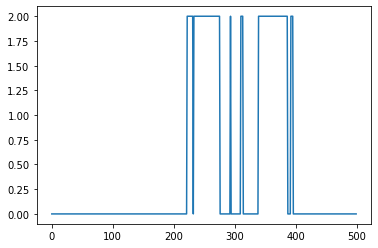

In [61]:
plt.plot(MarketData.tp[500:1000])

In [ ]:
'''
train, opt, test, windowについて。
train, opt, testは任意の値に決めることができるべき。
それに加えて連続した期間をtestするように自動で適切なtrain開始地点などを指定するモードも欲しい。
'''